Mapping High Risk Zone of GBV Cases in Rwanda

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from prophet import Prophet
import seaborn as sns

In [45]:
#pip install pandas geopandas matplotlib prophet

In [105]:
df1 = gpd.read_file(r"C:\Users\user\Desktop\Training (SDCBI)\GitHub\Machine Learning\Data\RWA_adm1.shp")
df1.head()

ID_0  ISO  NAME_0  ID_1            NAME_1    TYPE_1 ENGTYPE_1 NL_NAME_1  \
0   189  RWA  Rwanda     1      Amajyaruguru  Province  Province      None   
1   189  RWA  Rwanda     2         Amajyepfo  Province  Province      None   
2   189  RWA  Rwanda     3     Iburasirazuba  Province  Province      None   
3   189  RWA  Rwanda     4    Iburengerazuba  Province  Province      None   
4   189  RWA  Rwanda     5  Umujyi wa Kigali  Province  Province      None   

                                           VARNAME_1  \
0                 Northern Province|Province du Nord   
1                  Southern Province|Province du Sud   
2                 Eastern Province|Province de l'Est   
3  Western Province|Province de l'Ouestern Provin...   
4                        Kigali City|Ville de Kigali   

                                            geometry  
0  POLYGON ((29.82406 -1.30875, 29.82414 -1.30877...  
1  POLYGON ((29.66811 -1.73118, 29.66834 -1.73122...  
2  POLYGON ((30.44824 -1.04768, 30.44844 -1.04775...  
3  POLYGON ((29.45157 -1.50799, 29.45548 -1.51334...  
4  POLYGON ((30.14786 -1.79269, 30.14801 -1.7927,...

<Figure size 1200x2000 with 0 Axes>

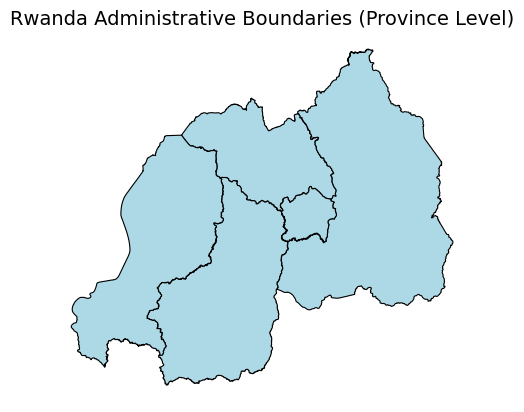

In [46]:
plt.figure(figsize=(12, 20))
df1.plot(column=None, edgecolor='black', color='lightblue', linewidth=0.8)

# Add title and remove axis
plt.title("Rwanda Administrative Boundaries (Province Level)", fontsize=14)
plt.axis('off')
plt.show()

In [47]:
df2 = gpd.read_file(r"C:\Users\user\Desktop\Training (SDCBI)\GitHub\Machine Learning\Data\RWA_adm2.shx")
df2.head()

ID_0  ISO  NAME_0  ID_1        NAME_1  ID_2   NAME_2    TYPE_2 ENGTYPE_2  \
0   189  RWA  Rwanda     1  Amajyaruguru     1   Burera  District  District   
1   189  RWA  Rwanda     1  Amajyaruguru     2  Gakenke  District  District   
2   189  RWA  Rwanda     1  Amajyaruguru     3  Gicumbi  District  District   
3   189  RWA  Rwanda     1  Amajyaruguru     4  Musanze  District  District   
4   189  RWA  Rwanda     1  Amajyaruguru     5  Rulindo  District  District   

  NL_NAME_2 VARNAME_2                                           geometry  
0      None      None  POLYGON ((29.82406 -1.30875, 29.82414 -1.30877...  
1      None      None  POLYGON ((29.77391 -1.55936, 29.77411 -1.55974...  
2      None      None  POLYGON ((30.07308 -1.39172, 30.07328 -1.39179...  
3      None      None  POLYGON ((29.61437 -1.3864, 29.61596 -1.38658,...  
4      None      None  POLYGON ((29.90165 -1.58997, 29.90172 -1.59004...

<Figure size 1200x12000 with 0 Axes>

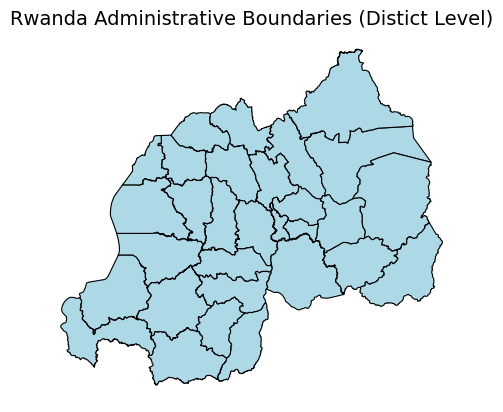

In [48]:
plt.figure(figsize=(12, 120))
df2.plot(column=None, edgecolor='black', color='lightblue', linewidth=0.8)

# Add title and remove axis
plt.title("Rwanda Administrative Boundaries (Distict Level)", fontsize=14)
plt.axis('off')
plt.show()

In [49]:
df3 = gpd.read_file(r"C:\Users\user\Desktop\Training (SDCBI)\GitHub\Machine Learning\Data\RWA_adm3.shx")
df3.head()

ID_0  ISO  NAME_0  ID_1        NAME_1  ID_2  NAME_2  ID_3   NAME_3  TYPE_3  \
0   189  RWA  Rwanda     1  Amajyaruguru     1  Burera     1   Bungwe  Sector   
1   189  RWA  Rwanda     1  Amajyaruguru     1  Burera     2   Butaro  Sector   
2   189  RWA  Rwanda     1  Amajyaruguru     1  Burera     3  Cyanika  Sector   
3   189  RWA  Rwanda     1  Amajyaruguru     1  Burera     4    Cyeru  Sector   
4   189  RWA  Rwanda     1  Amajyaruguru     1  Burera     5  Gahunga  Sector   

  ENGTYPE_3 NL_NAME_3 VARNAME_3  \
0    Sector      None      None   
1    Sector      None      None   
2    Sector      None      None   
3    Sector      None      None   
4    Sector      None      None   

                                            geometry  
0  POLYGON ((29.98542 -1.45859, 29.98555 -1.45892...  
1  POLYGON ((29.85182 -1.34369, 29.85192 -1.34424...  
2  POLYGON ((29.73102 -1.34058, 29.73149 -1.34087...  
3  POLYGON ((29.81518 -1.47519, 29.81554 -1.47526...  
4  POLYGON ((29.68848 -1.37768, 29.69047 -1.38383...

<Figure size 800x1000 with 0 Axes>

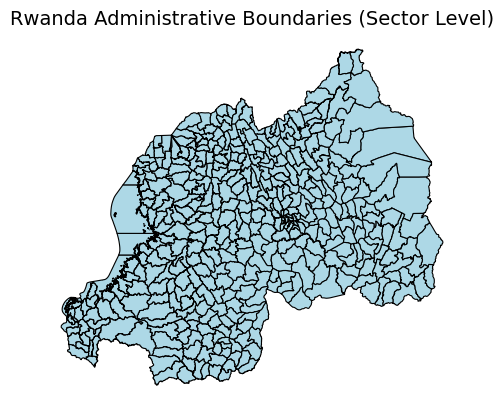

In [50]:
plt.figure(figsize=(8, 10))
df3.plot(column=None, edgecolor='black', color='lightblue', linewidth=0.8)

# Add title and remove axis
plt.title("Rwanda Administrative Boundaries (Sector Level)", fontsize=14)
plt.axis('off')
plt.show()

In [51]:
df4=pd.read_csv(r"C:\Users\user\Desktop\Training (SDCBI)\GitHub\Machine Learning\Data\GBV cases from GMO.csv")
df4.tail()

Year   District     Sector         Cell   Age  Gender  \
462  2025.0   Kicukiro    Gatenga       Nyanza  39.0  Female   
463  2025.0     Gasabo    Bumbogo  Nyabikenke   45.0  Female   
464  2025.0  Rwamagana  Nyakariro      Gishore  41.0    Male   
465     NaN        NaN        NaN          NaN   NaN     NaN   
466     NaN        NaN        NaN          NaN   NaN     NaN   

                                     Type  
462  Psychological  and Economic Violence  
463                Psychological Violence  
464                Psychological Violence  
465                                   NaN  
466                                   NaN

In [52]:
df5 = df4.iloc[:-2]
df5.head()


Year   District     Sector      Cell   Age  Gender  \
0  2022.0   Kicukiro   Kigarama  Kigarama  26.0  Female   
1  2022.0     Gasabo  Kinyinya     Kagugu  39.0  Female   
2  2022.0  Ngororero    Matyazo    Gitega  24.0  Female   
3  2022.0   Kicukiro    Gahanga    Kadasa  28.0  Female   
4  2022.0    Karongi   Rwankuba    Munini  34.0  Female   

                     Type  
0      Economic Violence   
1         Sexual violence  
2      Economic Violence   
3         Sexual violence  
4  Psychological Violence

In [53]:
df5.isnull().sum()



Year        0
District    0
Sector      0
Cell        0
Age         0
Gender      0
Type        0
dtype: int64

In [54]:
print("\n=== GBV Cases by Gender ===")
print(df5['Gender'].value_counts(normalize=True) * 100)



=== GBV Cases by Gender ===
Gender
Female    82.150538
Male      17.849462
Name: proportion, dtype: float64


In [55]:
df5.value_counts()

Year    District   Sector      Cell       Age   Gender  Type                                
2024.0  Gasabo     Bumbogo     Nyagasozi  51.0  Female  Economic Violence                       3
2022.0  Musanze    Gacaca      Gakoro     60.0  Male    Psychological Violence                  2
2024.0  Rwamagana  Gishari     Binunga    34.0  Female  Economic Violence                       2
2023.0  Gasabo     Bumbogo     Kinyaga    40.0  Male    Economic Violence                       2
        Gasabo     Kinyinya    Gasharu    44.0  Female  Psychological Violence                  2
                                                                                               ..
2022.0  Gasabo     Jabana      Kidashya   56.0  Male    Psychological  and Economic Violence    1
                               Ngiryi     16.0  Female  Sexual violence                         1
                   Kacyiru     Kamutwa    51.0  Male    Psychological Violence                  1
                   Kimihu

In [57]:


print("\n=== GBV Cases by District ===")
print(df5['District'].value_counts().head(10))




=== GBV Cases by District ===
District
Gasabo        61
Nyagatare     47
Kirehe        33
Kicukiro      33
Nyarugenge    20
Bugesera      19
Rwamagana     17
Gakenke       15
Gatsibo       14
Kamonyi       14
Name: count, dtype: int64


In [59]:
print("\n=== GBV Cases by Year ===")
print(df5['Year'].value_counts().sort_index())


=== GBV Cases by Year ===
Year
2022.0    109
2023.0    182
2024.0    150
2025.0     24
Name: count, dtype: int64


In [60]:
print("\n=== GBV Cases by Type ===")
print(df5['Type'].value_counts())


=== GBV Cases by Type ===
Type
Economic Violence                       196
Psychological Violence                  179
Sexual violence                          48
Physical Violence                        18
Psychological  and Economic Violence     16
Economic and Physical Violence            3
Economic and Sexual Violence              3
Psychological  and Sexual  Violence       1
Economic and Pschological Violence        1
Name: count, dtype: int64


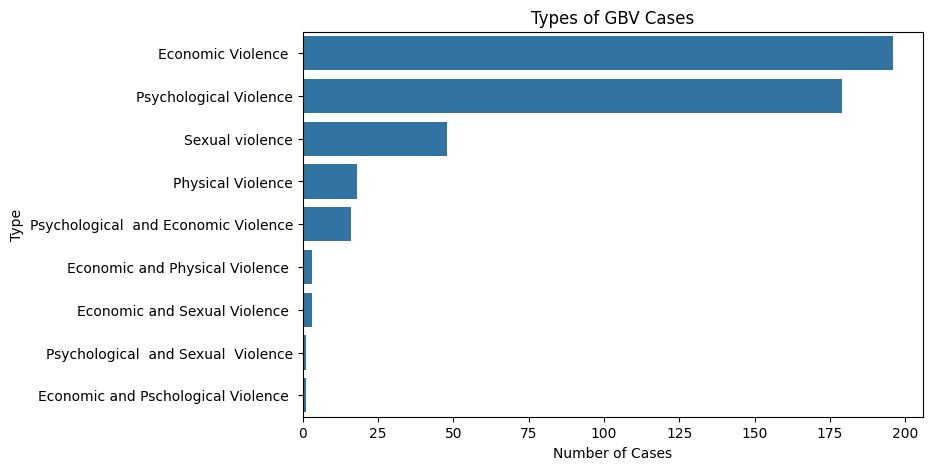

In [61]:
plt.figure(figsize=(8,5))
sns.countplot(data=df5, y='Type', order=df5['Type'].value_counts().index)
plt.title("Types of GBV Cases")
plt.xlabel("Number of Cases")
plt.ylabel("Type")
plt.show()

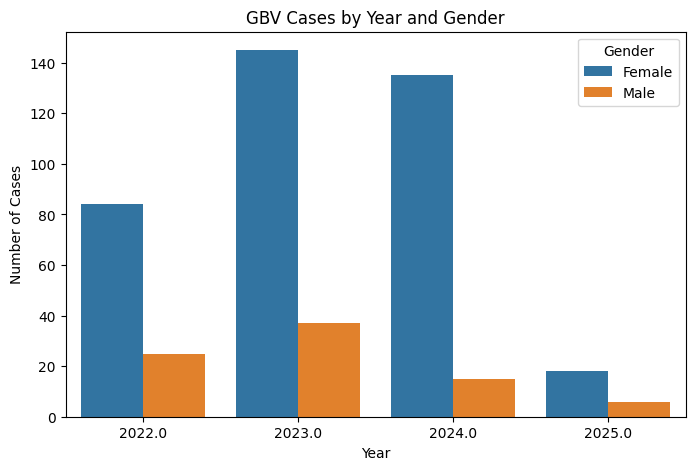

In [62]:
plt.figure(figsize=(8,5))
sns.countplot(data=df5, x='Year', hue='Gender')
plt.title("GBV Cases by Year and Gender")
plt.ylabel("Number of Cases")
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_23992\3646914385.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df5, x='Type', y='Age', palette='coolwarm')


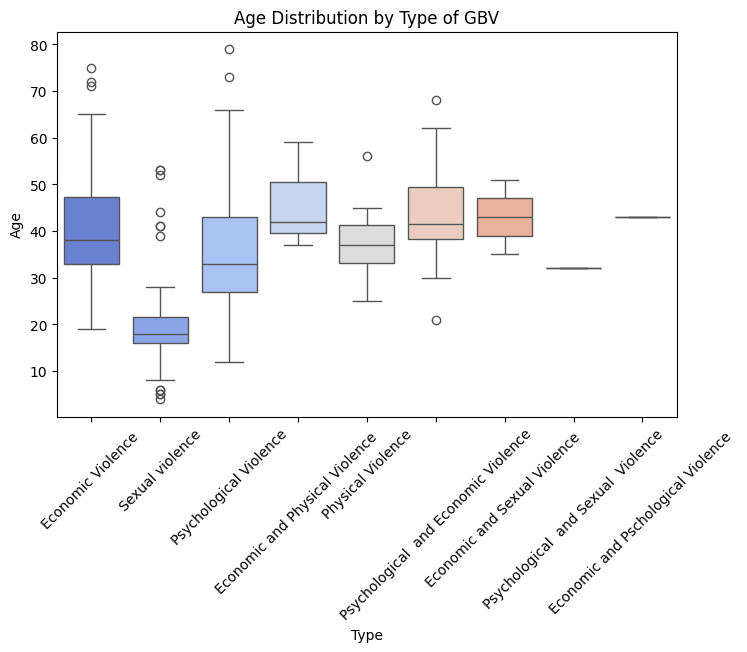

In [63]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df5, x='Type', y='Age', palette='coolwarm')
plt.title("Age Distribution by Type of GBV")
plt.xticks(rotation=45)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_23992\244945285.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_districts.values, y=top_districts.index, palette='mako')


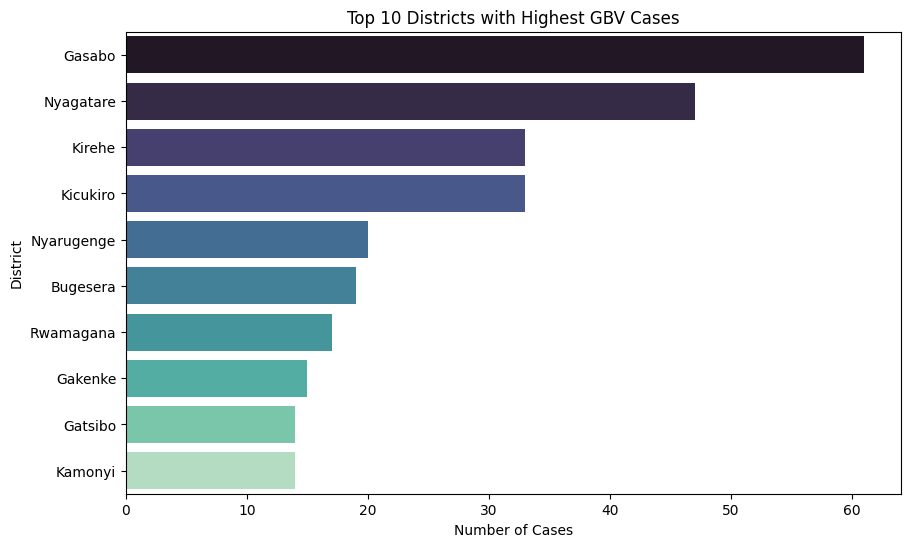

In [64]:
top_districts = df5['District'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_districts.values, y=top_districts.index, palette='mako')
plt.title("Top 10 Districts with Highest GBV Cases")
plt.xlabel("Number of Cases")
plt.ylabel("District")
plt.show()

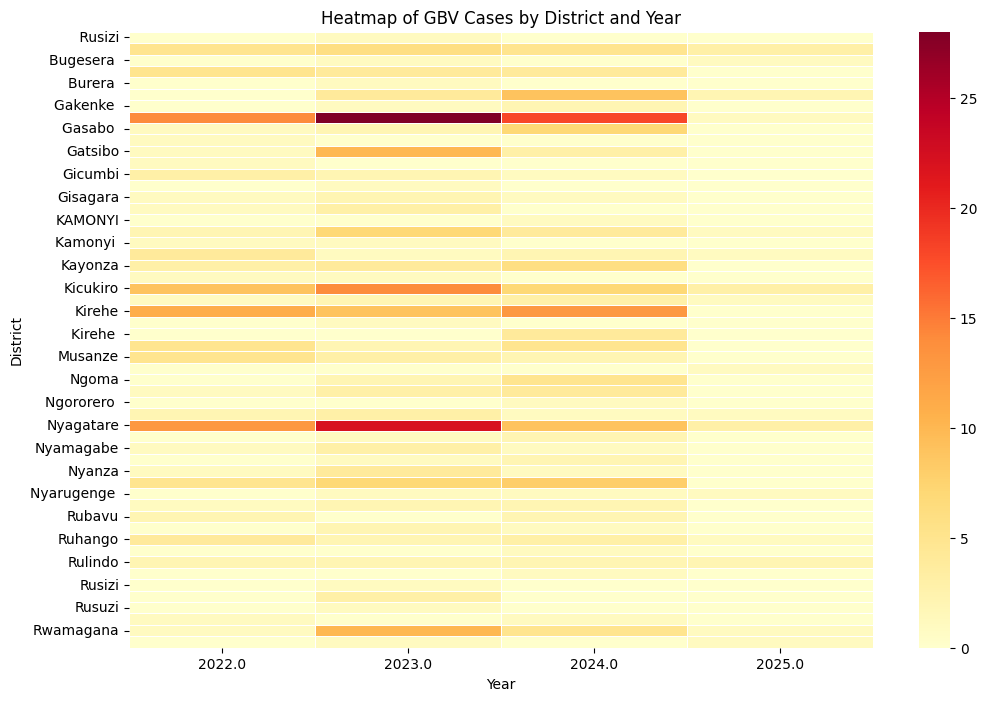

In [65]:
pivot_table = pd.pivot_table(df5, index='District', columns='Year', values='Type', aggfunc='count', fill_value=0)
plt.figure(figsize=(12,8))
sns.heatmap(pivot_table, cmap='YlOrRd', linewidths=0.5)
plt.title("Heatmap of GBV Cases by District and Year")
plt.show()

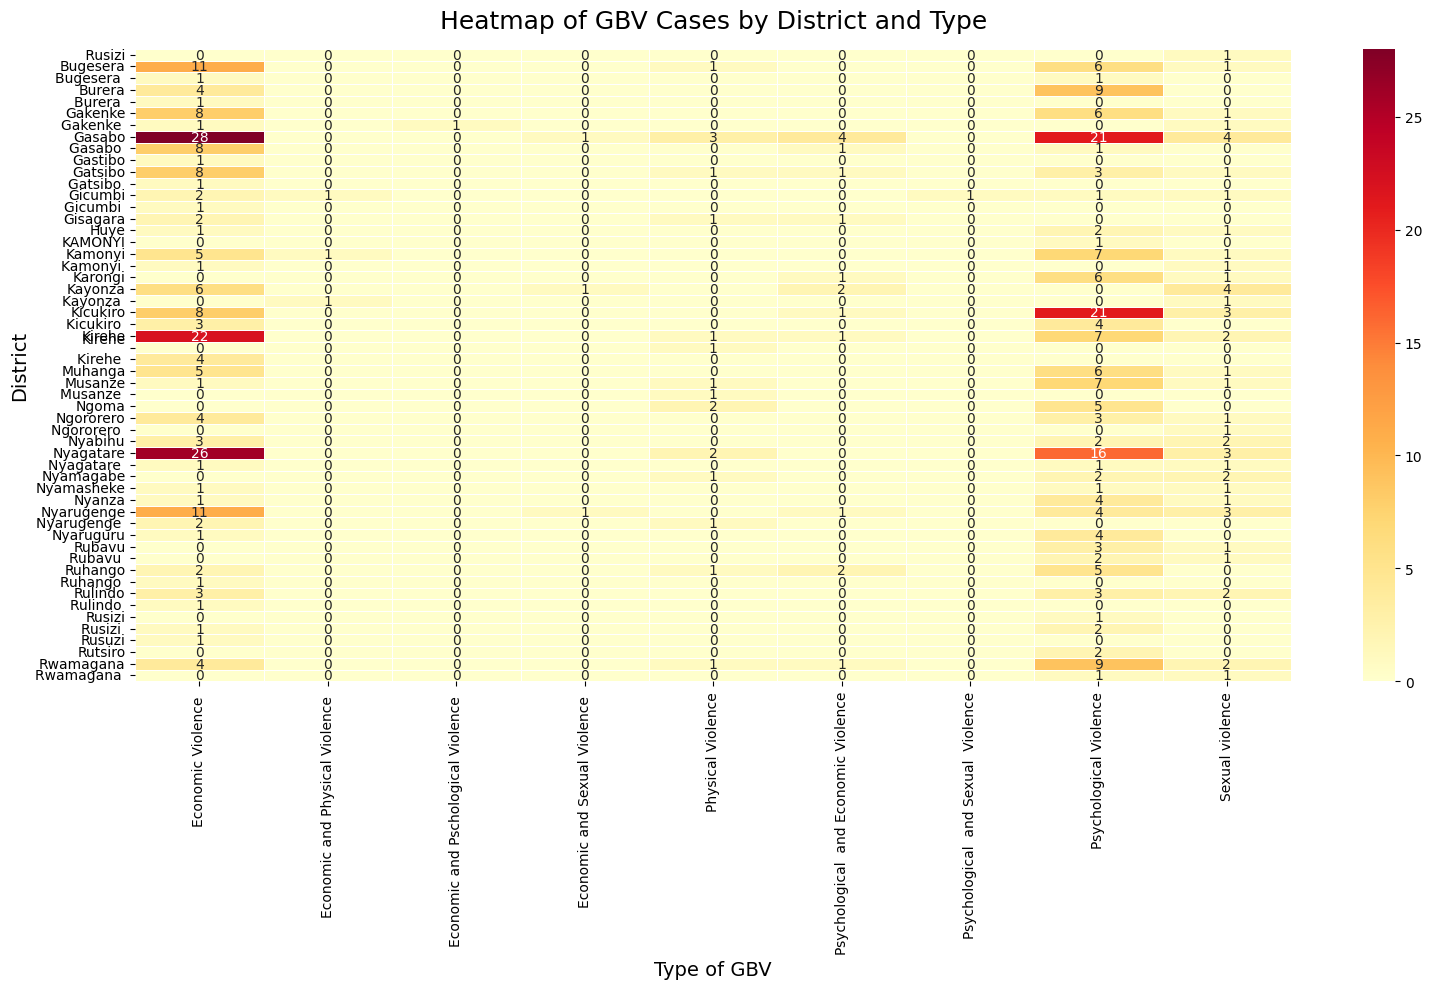

In [103]:
# Create pivot table counting cases by District and Type
heat_df = df5.pivot_table(
    index='District',
    columns='Type',
    values='Year',       # or any column, we just need to count rows
    aggfunc='count',
    fill_value=0
)

# Plot heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(
    heat_df,
    cmap='YlOrRd',
    linewidths=0.5,
    annot=True,
    fmt='d'
)
plt.title('Heatmap of GBV Cases by District and Type', fontsize=18, pad=15)
plt.xlabel('Type of GBV', fontsize=14)
plt.ylabel('District', fontsize=14)
plt.tight_layout()
plt.show()

In [66]:
age_summary = df5.groupby(['Gender', 'Type'])['Age'].mean().reset_index()
print("\nAverage Age by Gender and Type of GBV:\n", age_summary)


Average Age by Gender and Type of GBV:
     Gender                                  Type        Age
0   Female                    Economic Violence   39.947674
1   Female       Economic and Physical Violence   39.500000
2   Female   Economic and Pschological Violence   43.000000
3   Female         Economic and Sexual Violence   35.000000
4   Female                     Physical Violence  35.933333
5   Female  Psychological  and Economic Violence  40.153846
6   Female   Psychological  and Sexual  Violence  32.000000
7   Female                Psychological Violence  33.761194
8   Female                       Sexual violence  20.348837
9     Male                    Economic Violence   45.125000
10    Male       Economic and Physical Violence   59.000000
11    Male         Economic and Sexual Violence   47.000000
12    Male                     Physical Violence  43.333333
13    Male  Psychological  and Economic Violence  57.333333
14    Male                Psychological Violence  39.888889

In [69]:
df5

Year    District     Sector         Cell   Age  Gender  \
0    2022.0    Kicukiro   Kigarama     Kigarama  26.0  Female   
1    2022.0      Gasabo  Kinyinya        Kagugu  39.0  Female   
2    2022.0   Ngororero    Matyazo       Gitega  24.0  Female   
3    2022.0    Kicukiro    Gahanga       Kadasa  28.0  Female   
4    2022.0     Karongi   Rwankuba       Munini  34.0  Female   
..      ...         ...        ...          ...   ...     ...   
460  2025.0     Kamonyi      Runda      Ruyenzi  38.0  Female   
461  2025.0  Rwamagana     Muhazi         Ntebe  28.0  Female   
462  2025.0    Kicukiro    Gatenga       Nyanza  39.0  Female   
463  2025.0      Gasabo    Bumbogo  Nyabikenke   45.0  Female   
464  2025.0   Rwamagana  Nyakariro      Gishore  41.0    Male   

                                     Type  
0                      Economic Violence   
1                         Sexual violence  
2                      Economic Violence   
3                         Sexual violence  
4                  Psychological Violence  
..                                    ...  
460                    Economic Violence   
461                       Sexual violence  
462  Psychological  and Economic Violence  
463                Psychological Violence  
464                Psychological Violence  

[465 rows x 7 columns]

In [70]:
df2 = df2.rename(columns={"NAME_2": "District"})
df2.head()

ID_0  ISO  NAME_0  ID_1        NAME_1  ID_2 District    TYPE_2 ENGTYPE_2  \
0   189  RWA  Rwanda     1  Amajyaruguru     1   Burera  District  District   
1   189  RWA  Rwanda     1  Amajyaruguru     2  Gakenke  District  District   
2   189  RWA  Rwanda     1  Amajyaruguru     3  Gicumbi  District  District   
3   189  RWA  Rwanda     1  Amajyaruguru     4  Musanze  District  District   
4   189  RWA  Rwanda     1  Amajyaruguru     5  Rulindo  District  District   

  NL_NAME_2 VARNAME_2                                           geometry  
0      None      None  POLYGON ((29.82406 -1.30875, 29.82414 -1.30877...  
1      None      None  POLYGON ((29.77391 -1.55936, 29.77411 -1.55974...  
2      None      None  POLYGON ((30.07308 -1.39172, 30.07328 -1.39179...  
3      None      None  POLYGON ((29.61437 -1.3864, 29.61596 -1.38658,...  
4      None      None  POLYGON ((29.90165 -1.58997, 29.90172 -1.59004...

In [71]:
map_df = df2.merge(district_cases, left_on='District', right_on='District', how='left')
map_df.head()

ID_0  ISO  NAME_0  ID_1        NAME_1  ID_2 District    TYPE_2 ENGTYPE_2  \
0   189  RWA  Rwanda     1  Amajyaruguru     1   Burera  District  District   
1   189  RWA  Rwanda     1  Amajyaruguru     2  Gakenke  District  District   
2   189  RWA  Rwanda     1  Amajyaruguru     3  Gicumbi  District  District   
3   189  RWA  Rwanda     1  Amajyaruguru     4  Musanze  District  District   
4   189  RWA  Rwanda     1  Amajyaruguru     5  Rulindo  District  District   

  NL_NAME_2 VARNAME_2                                           geometry  \
0      None      None  POLYGON ((29.82406 -1.30875, 29.82414 -1.30877...   
1      None      None  POLYGON ((29.77391 -1.55936, 29.77411 -1.55974...   
2      None      None  POLYGON ((30.07308 -1.39172, 30.07328 -1.39179...   
3      None      None  POLYGON ((29.61437 -1.3864, 29.61596 -1.38658,...   
4      None      None  POLYGON ((29.90165 -1.58997, 29.90172 -1.59004...   

   GBV_Cases  
0         13  
1         15  
2          6  
3         10  
4          8

<Figure size 1200x1000 with 0 Axes>

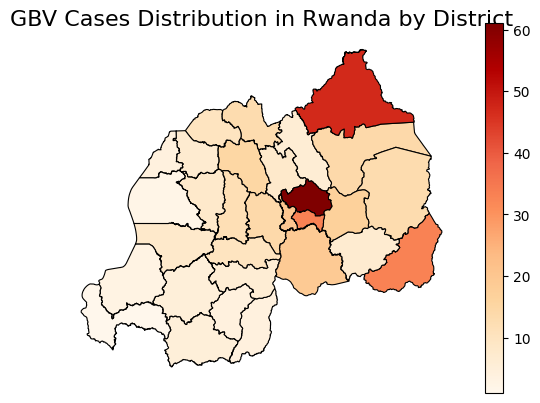

In [72]:
plt.figure(figsize=(12,10))

# Plotting GBV cases by district using a gradient (OrRd: light to dark red)
map_df.plot(
    column='GBV_Cases',      # Column to visualize
    cmap='OrRd',             # Color map (gradient)
    legend=True,             # Show legend
    linewidth=0.8,           # Borders width
    edgecolor='black',       # Border color
    missing_kwds={"color": "lightgrey"}  # Color for districts with no data
)

plt.title("GBV Cases Distribution in Rwanda by District", fontsize=16)
plt.axis('off')  # Remove axes
plt.show()

In [39]:
district_type_cases = df5.groupby(['District', 'Type']).size().reset_index(name='Count')

# Optional: pivot so each GBV type is a separate column
district_type_pivot = district_type_cases.pivot(index='District', columns='Type', values='Count').fillna(0)

# Merge with shapefile GeoDataFrame
map_df = df2.merge(district_type_pivot, left_on='District', right_on='District', how='left')
map_df.head()

ID_0  ISO  NAME_0  ID_1        NAME_1  ID_2 District    TYPE_2 ENGTYPE_2  \
0   189  RWA  Rwanda     1  Amajyaruguru     1   Burera  District  District   
1   189  RWA  Rwanda     1  Amajyaruguru     2  Gakenke  District  District   
2   189  RWA  Rwanda     1  Amajyaruguru     3  Gicumbi  District  District   
3   189  RWA  Rwanda     1  Amajyaruguru     4  Musanze  District  District   
4   189  RWA  Rwanda     1  Amajyaruguru     5  Rulindo  District  District   

  NL_NAME_2  ...                                           geometry  \
0      None  ...  POLYGON ((29.82406 -1.30875, 29.82414 -1.30877...   
1      None  ...  POLYGON ((29.77391 -1.55936, 29.77411 -1.55974...   
2      None  ...  POLYGON ((30.07308 -1.39172, 30.07328 -1.39179...   
3      None  ...  POLYGON ((29.61437 -1.3864, 29.61596 -1.38658,...   
4      None  ...  POLYGON ((29.90165 -1.58997, 29.90172 -1.59004...   

  Economic Violence   Economic and Physical Violence   \
0                4.0                              0.0   
1                8.0                              0.0   
2                2.0                              1.0   
3                1.0                              0.0   
4                3.0                              0.0   

   Economic and Pschological Violence   Economic and Sexual Violence   \
0                                  0.0                            0.0   
1                                  0.0                            0.0   
2                                  0.0                            0.0   
3                                  0.0                            0.0   
4                                  0.0                            0.0   

   Physical Violence  Psychological  and Economic Violence  \
0                0.0                                   0.0   
1                0.0                                   0.0   
2                0.0                                   0.0   
3                1.0                                   0.0   
4                0.0                                   0.0   

   Psychological  and Sexual  Violence  Psychological Violence  \
0                                  0.0                     9.0   
1                                  0.0                     6.0   
2                                  1.0                     1.0   
3                                  0.0                     7.0   
4                                  0.0                     3.0   

   Sexual violence  
0              0.0  
1              1.0  
2              1.0  
3              1.0  
4              2.0  

[5 rows x 21 columns]

<Figure size 1200x1000 with 0 Axes>

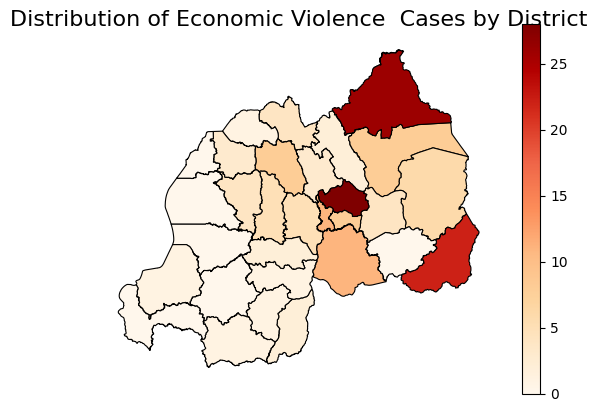

<Figure size 1200x1000 with 0 Axes>

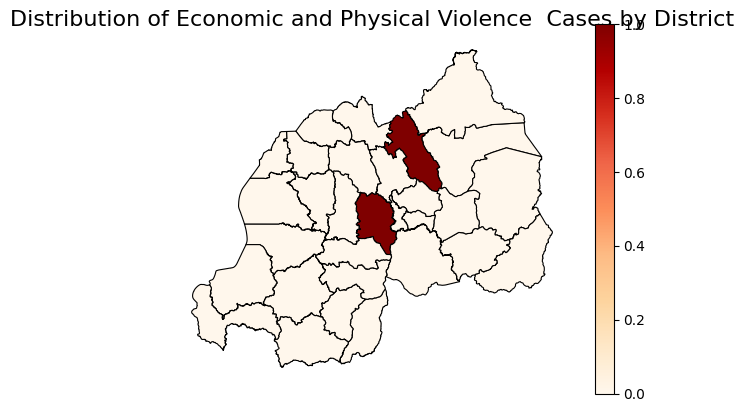

<Figure size 1200x1000 with 0 Axes>

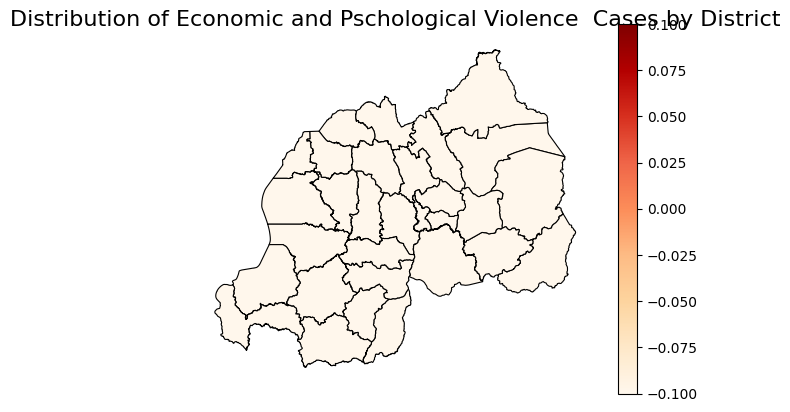

<Figure size 1200x1000 with 0 Axes>

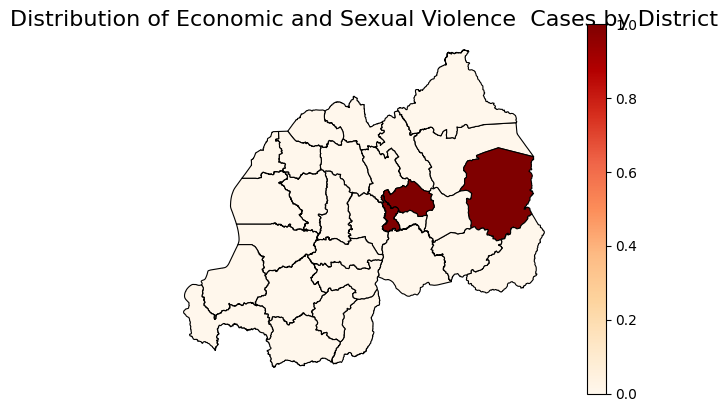

<Figure size 1200x1000 with 0 Axes>

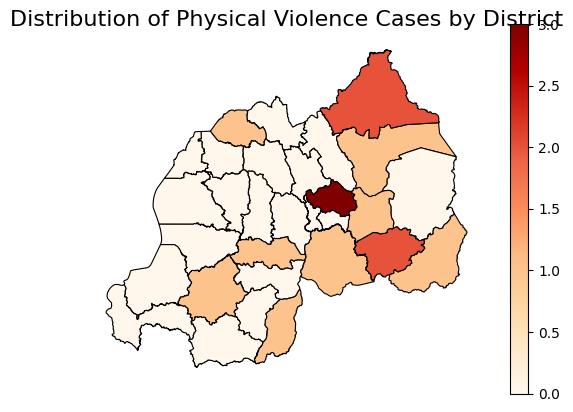

<Figure size 1200x1000 with 0 Axes>

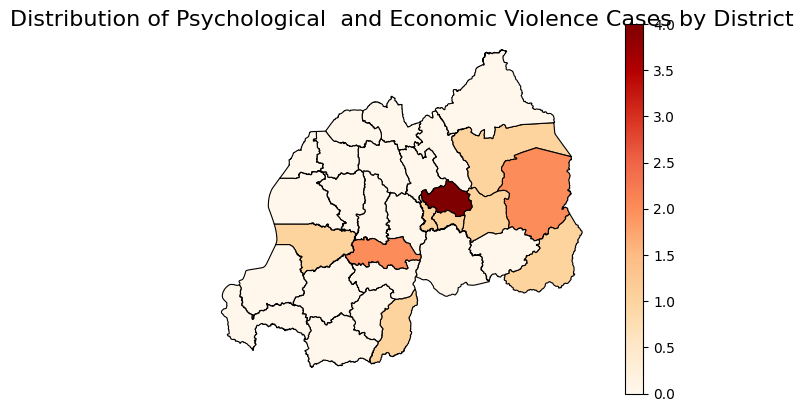

<Figure size 1200x1000 with 0 Axes>

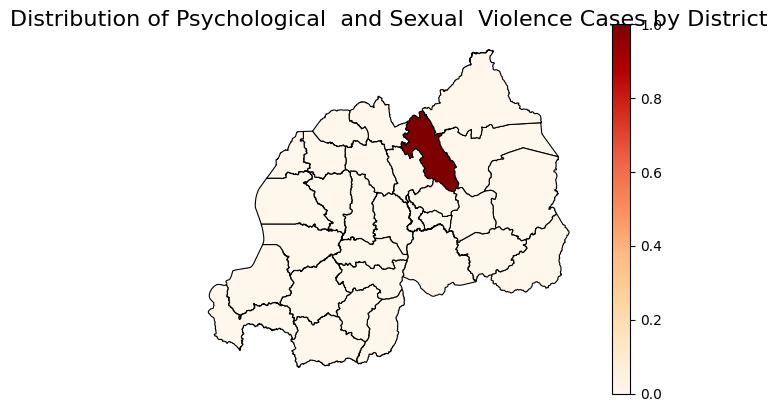

<Figure size 1200x1000 with 0 Axes>

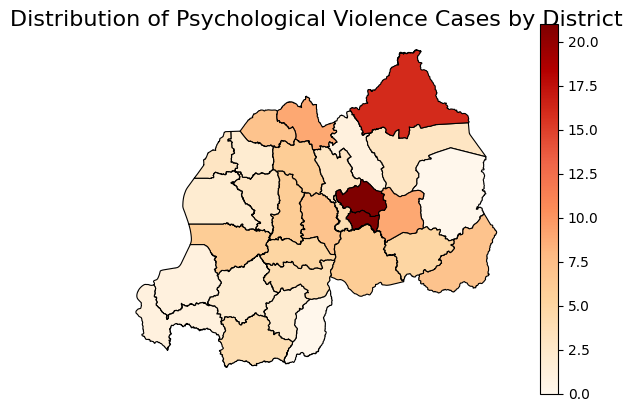

<Figure size 1200x1000 with 0 Axes>

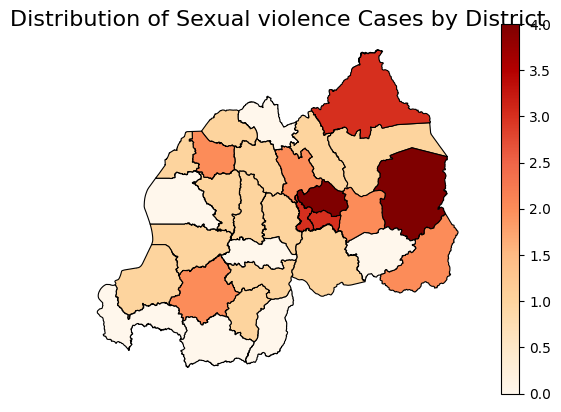

In [121]:
gbv_types = district_type_pivot.columns.tolist()

for gbv in gbv_types:
    plt.figure(figsize=(12,10))
    map_df.plot(
        column=gbv,
        cmap='OrRd',
        legend=True,
        linewidth=0.8,
        edgecolor='black',
        missing_kwds={"color": "lightgrey"}
    )
    plt.title(f"Distribution of {gbv} Cases by District", fontsize=16)
    plt.axis('off')
    plt.show()

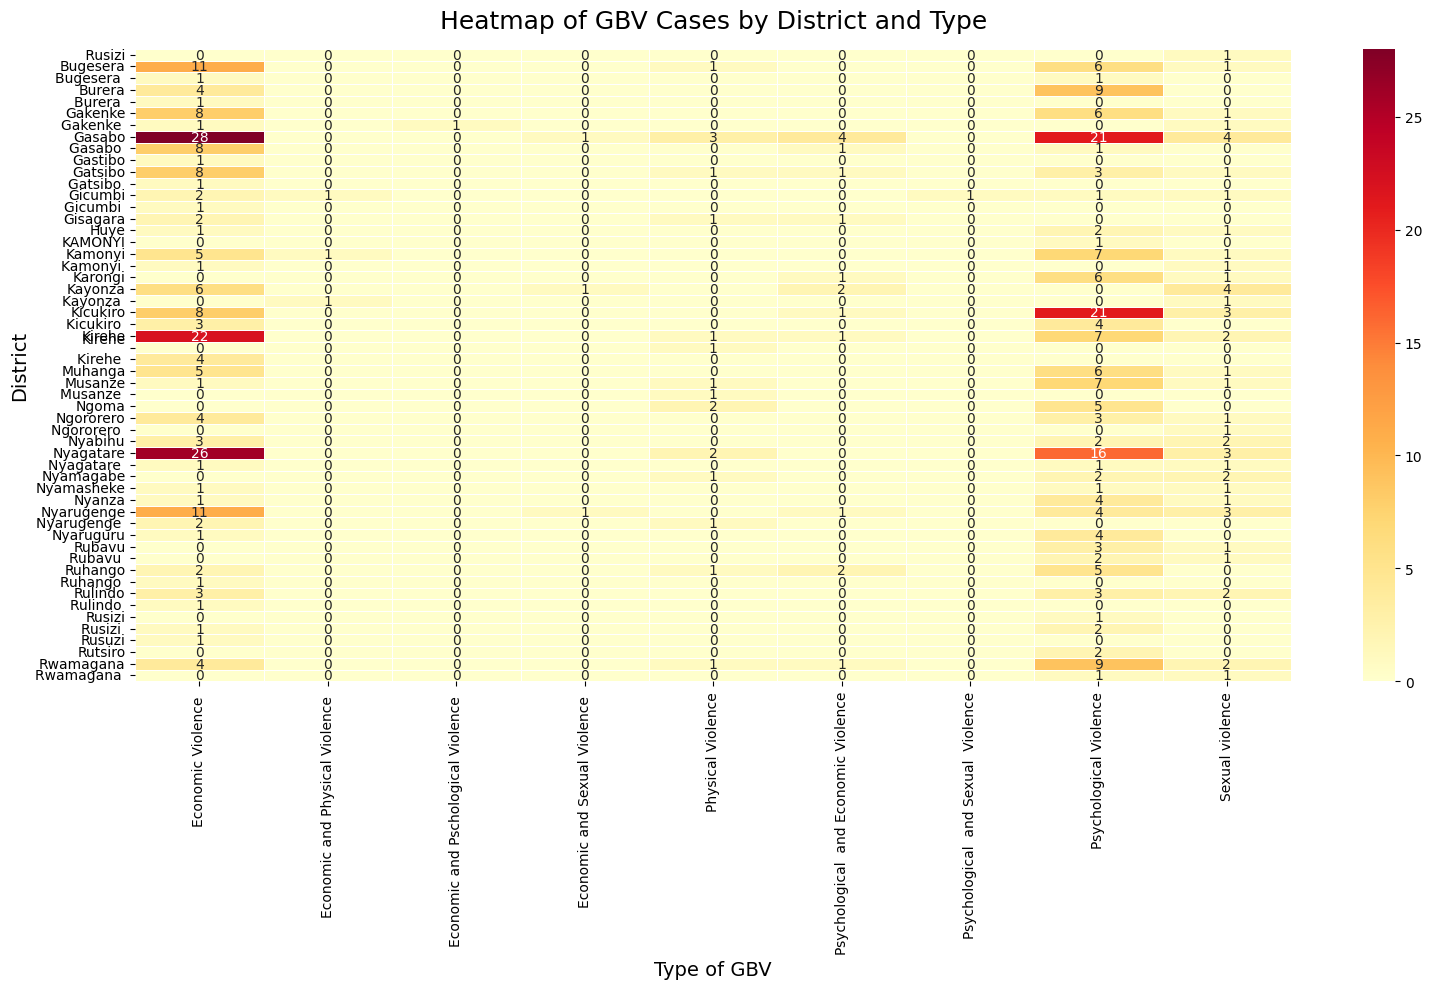